In [98]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
from pandas import set_option
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline



In [7]:
# Reading in the data
stock_data = pd.read_csv('~/Documents/stthom_classes/practicum/practicum/stock_data.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
benchmark_data = pd.read_csv('~/Documents/stthom_classes/practicum/practicum/benchmark_index.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()

In [19]:
stock_data

,Apple,Microsoft,Tesla,Starbucks,Amazon
Date,,,,,
2020-10-05,116.50,210.38,425.68,88.47,3199.20
2020-10-06,113.16,205.91,413.98,87.01,3099.96
2020-10-07,115.08,209.83,425.30,88.45,3195.69
2020-10-08,114.97,210.58,425.92,89.53,3190.55
2020-10-09,116.97,215.81,434.00,90.01,3286.65
...,...,...,...,...,...
2021-09-28,141.91,283.52,777.56,111.71,3315.96
2021-09-29,142.83,284.00,781.31,112.17,3301.12
2021-09-30,141.50,281.92,775.48,110.31,3285.04


## Summary for Stock Data and Benchmark Data

In [8]:
# Summary for stock_data
print('Stocks\n')
stock_data.info()
print(stock_data.head())
# Summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()
print(benchmark_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apple      252 non-null    float64
 1   Microsoft  252 non-null    float64
 2   Tesla      252 non-null    float64
 3   Starbucks  252 non-null    float64
 4   Amazon     252 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB
             Apple  Microsoft   Tesla  Starbucks   Amazon
Date                                                     
2020-10-05  116.50     210.38  425.68      88.47  3199.20
2020-10-06  113.16     205.91  413.98      87.01  3099.96
2020-10-07  115.08     209.83  425.30      88.45  3195.69
2020-10-08  114.97     210.58  425.92      89.53  3190.55
2020-10-09  116.97     215.81  434.00      90.01  3286.65

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-05 to 2021-10-04
Data columns (total 1 columns):
 #   C

## Visualizing and Summarizing Stock Data

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,252.000000,252.000000,252.000000,252.000000,252.000000
mean,131.606865,248.820437,657.230794,107.864960,3285.608413
std,11.183901,29.668872,117.110005,9.088476,159.571700
min,108.770000,202.330000,388.040000,85.970000,2951.950000
25%,122.757500,221.610000,605.127500,102.927500,3175.472500
50%,130.285000,244.345000,670.955000,110.385000,3270.465000
75%,142.030000,277.345000,730.355000,114.632500,3379.165000
max,156.690000,305.220000,883.090000,126.060000,3731.410000


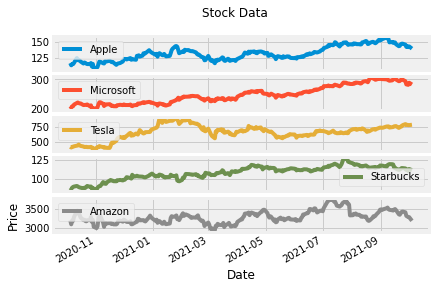

In [9]:
# visualize the stock_data
stock_data.plot(subplots = True,title = 'Stock Data')
plt.ylabel('Price')
# summarize the stock_data
stock_data.describe()

## Visualizing and Summarizing the Benchmark Index

,S&P 500
count,252.000000
mean,4014.999444
std,337.258433
min,3269.960000
25%,3734.530000
50%,4075.925000
75%,4310.640000
max,4536.950000


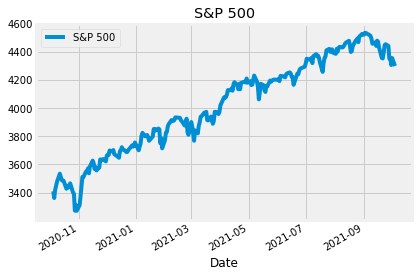

In [10]:
# Visualize the benchmark index
benchmark_data.plot(title = 'S&P 500')
# Summarize the benchmark index
benchmark_data.describe()

## Daily Stock Returns

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.000860,0.001280,0.002981,0.001020,0.000126
std,0.017496,0.013878,0.033765,0.014130,0.016594
min,-0.056018,-0.049566,-0.085499,-0.065145,-0.075649
25%,-0.008582,-0.005633,-0.018009,-0.007232,-0.008574
50%,0.000419,0.000560,0.001663,0.000262,0.000719
75%,0.012130,0.009985,0.020486,0.008964,0.009458
max,0.063521,0.048249,0.196412,0.057694,0.063230


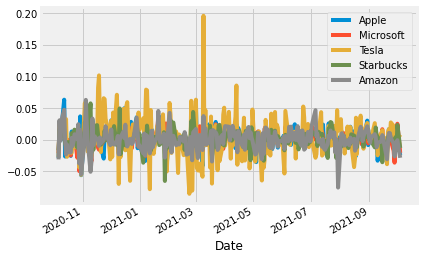

In [11]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot()

# summarize the daily returns
stock_returns.describe()

## Daily Benchmark Index Returns

count    251.000000
mean       0.000964
std        0.008670
min       -0.035288
25%       -0.003514
50%        0.001165
75%        0.006465
max        0.023791
Name: S&P 500, dtype: float64

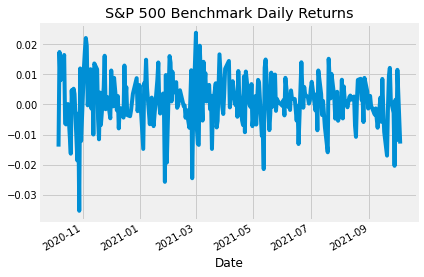

In [12]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

# plot the daily returns
sp_returns.plot(title = 'S&P 500 Benchmark Daily Returns')

# summarize the daily returns
sp_returns.describe()

## Difference in Daily Returns

,Apple,Microsoft,Tesla,Starbucks,Amazon
count,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.000104,0.000316,0.002018,0.000056,-0.000838
std,0.013177,0.009676,0.031258,0.011292,0.013679
min,-0.044746,-0.035524,-0.077766,-0.043978,-0.070243
25%,-0.007935,-0.005187,-0.017270,-0.005345,-0.007837
50%,-0.000848,-0.000048,0.000702,-0.000523,-0.001097
75%,0.007046,0.005346,0.018526,0.004830,0.006006
max,0.047102,0.028131,0.182257,0.050986,0.048949


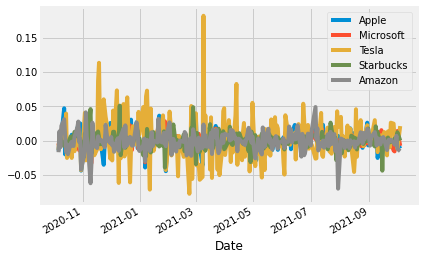

In [13]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)

# plot the excess_returns
excess_returns.plot()

# summarize the excess_returns
excess_returns.describe()

## Mean of Excess Returns

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

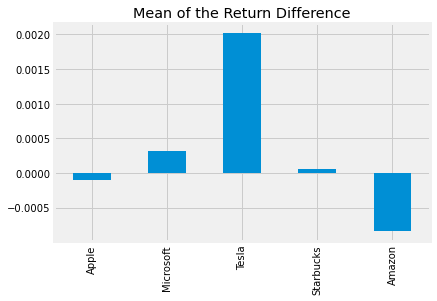

In [14]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title = 'Mean of the Return Difference')

## Standard Deviations of Excess Returns

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

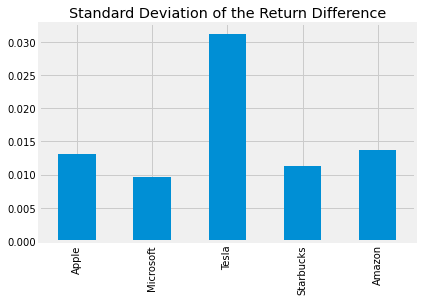

In [15]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title = 'Standard Deviation of the Return Difference')

## Daily Sharpe Ratio Calculation

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

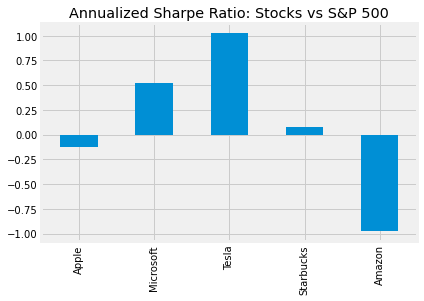

In [16]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio
annual_sharpe_ratio.plot.bar(title = 'Annualized Sharpe Ratio: Stocks vs S&P 500')

## Tesla had the highest 1 year Sharpe Ratio while Microsoft was 2nd and Starbuck 3rd.
## Apple and Amazon both had a negative Sharpe Ratio from the last year, because the risks outweighed its returns.
Recommendation based off the last year is to invest in Tesla and Microsoft.

# Predicting with the LSTM model

In [20]:
msft_csv = pd.read_csv('MSFT.csv')
apple_csv = pd.read_csv('AAPL.csv')
tsla_csv = pd.read_csv('TSLA.csv')
amzn_csv = pd.read_csv('AMZN.csv')
sbux_csv = pd.read_csv('SBUX.csv')

# Microsoft LSTM model

In [25]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back-1):
    
        
        a = dataset[i:(i+look_back), 0]
        
        dataX.append(a)
        
        dataY.append(dataset[i + look_back, 0])
        
        
    return np.array(dataX), np.array(dataY)


In [26]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [30]:
# fix random seed for reproducibility
np.random.seed(67)
# load the dataset

msft_df = msft_csv[['Open','High','Low','Close', 'Adj Close', 'Volume']]
dataset = msft_df.values

In [32]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 2
n_features = 6
n_obs = look_back*(n_features-1)+(n_features-1)
reframed = series_to_supervised(dataset, look_back, 1)
values = reframed.values

In [33]:
# split into train and test sets
train_size = int(len(values) * 0.70)
test_size = len(values) - train_size

train, test = values[0:train_size,:], values[train_size:len(values),:]

In [62]:
# reshape into X=t and Y=t+1

trainX, trainY = train[:, :n_obs], train[:, 4]
testX, testY = test[:, :n_obs], test[:, 4]

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back+1, n_features-1))
testX = np.reshape(testX, (testX.shape[0], look_back+1, n_features-1))

In [63]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
11/11 - 10s - loss: 0.1067
Epoch 2/200
11/11 - 0s - loss: 0.0821
Epoch 3/200
11/11 - 0s - loss: 0.0618
Epoch 4/200
11/11 - 0s - loss: 0.0453
Epoch 5/200
11/11 - 0s - loss: 0.0317
Epoch 6/200
11/11 - 0s - loss: 0.0225
Epoch 7/200
11/11 - 0s - loss: 0.0172
Epoch 8/200
11/11 - 0s - loss: 0.0150
Epoch 9/200
11/11 - 0s - loss: 0.0138
Epoch 10/200
11/11 - 0s - loss: 0.0126
Epoch 11/200
11/11 - 0s - loss: 0.0112
Epoch 12/200
11/11 - 0s - loss: 0.0098
Epoch 13/200
11/11 - 0s - loss: 0.0085
Epoch 14/200
11/11 - 0s - loss: 0.0071
Epoch 15/200
11/11 - 0s - loss: 0.0057
Epoch 16/200
11/11 - 0s - loss: 0.0044
Epoch 17/200
11/11 - 0s - loss: 0.0033
Epoch 18/200
11/11 - 0s - loss: 0.0023
Epoch 19/200
11/11 - 0s - loss: 0.0016
Epoch 20/200
11/11 - 0s - loss: 0.0012
Epoch 21/200
11/11 - 0s - loss: 8.3371e-04
Epoch 22/200
11/11 - 0s - loss: 6.9415e-04
Epoch 23/200
11/11 - 0s - loss: 6.0838e-04
Epoch 24/200
11/11 - 0s - loss: 5.7509e-04
Epoch 25/200
11/11 - 0s - loss: 5.6096e-04
Epoch 26/200


Epoch 192/200
11/11 - 0s - loss: 1.4007e-04
Epoch 193/200
11/11 - 0s - loss: 1.3564e-04
Epoch 194/200
11/11 - 0s - loss: 1.3869e-04
Epoch 195/200
11/11 - 0s - loss: 1.3897e-04
Epoch 196/200
11/11 - 0s - loss: 1.3857e-04
Epoch 197/200
11/11 - 0s - loss: 1.3411e-04
Epoch 198/200
11/11 - 0s - loss: 1.4044e-04
Epoch 199/200
11/11 - 0s - loss: 1.4290e-04
Epoch 200/200
11/11 - 0s - loss: 1.3526e-04


In [64]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [65]:
# invert predictions
trainX = trainX.reshape((trainX.shape[0], n_obs))

n_f = n_features - 1
# invert scaling for forecast
inv_ypred = np.concatenate((trainX[:,-n_f:],trainPredict), axis=1)

inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:,n_f]

In [66]:
# invert scaling for actual
trainY = trainY.reshape((len(trainY), 1))
predY = np.concatenate((trainX[:,-n_f:],trainY), axis=1)
predY = scaler.inverse_transform(predY)
predY = predY[:,n_f]

In [67]:
# make a prediction

testX = testX.reshape((testX.shape[0], n_obs))

In [68]:
# invert scaling for forecast
inv_yhat = np.concatenate((testX[:,-n_f:],testPredict), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,n_f]

In [69]:
# invert scaling for actual
testY = testY.reshape((len(testY), 1))
invY = np.concatenate((testX[:,-n_f:],testY), axis=1)
invY = scaler.inverse_transform(invY)
invY = invY[:,n_f]

In [71]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(invY, inv_yhat))
print('Test RMSE: %.8f' % rmse)

Test RMSE: 4307824.51104035


In [72]:
inv_ypred = inv_ypred.reshape((len(inv_ypred), 1))
predY = predY.reshape((len(predY), 1))
inv_yhat = inv_yhat.reshape((len(inv_yhat), 1))
invY = invY.reshape((len(invY), 1))
plotpredY = np.concatenate((inv_ypred, predY), axis=1)
plotactY = np.concatenate((inv_yhat, invY), axis=1)

In [73]:
trainPredictPlot = np.empty([len(dataset[:,0]),2])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(plotpredY)+look_back, :] = plotpredY

In [74]:
testPredictPlot = np.empty([len(dataset[:,0]),2])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(plotpredY)+look_back-1:len(dataset)-1, :] = plotactY


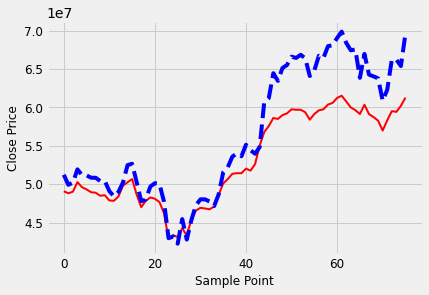

In [75]:
plotpredY = np.concatenate((inv_ypred, inv_yhat), axis=0)
plotactY =  np.concatenate((predY, invY), axis=0)
plt.figure(2)
plt.xlabel('Sample Point',fontsize=12)
plt.ylabel('Close',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(inv_yhat,'r-',label='Predicted',linewidth=2)
plt.plot(invY,'b--',label='Actual')
plt.style.use('fivethirtyeight')

# Apple LSTM Model

In [105]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    
    dataX, dataY = [], []
    
    for i in range(len(dataset)-look_back-1):
    
        
        a = dataset[i:(i+look_back), 0]
        
        dataX.append(a)
        
        dataY.append(dataset[i + look_back, 0])
        
        
    return np.array(dataX), np.array(dataY)


In [106]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [108]:
# fix random seed for reproducibility
np.random.seed(67)
# load the dataset

apple_df = apple_csv[['Open','High','Low','Close', 'Adj Close', 'Volume']]
dataset = apple_df.values

In [109]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 2
n_features = 6
n_obs = look_back*(n_features-1)+(n_features-1)
reframed = series_to_supervised(dataset, look_back, 1)
values = reframed.values

In [110]:
# split into train and test sets
train_size = int(len(values) * 0.70)
test_size = len(values) - train_size

train, test = values[0:train_size,:], values[train_size:len(values),:]

In [111]:
# reshape into X=t and Y=t+1

trainX, trainY = train[:, :n_obs], train[:, 4]
testX, testY = test[:, :n_obs], test[:, 4]

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back+1, n_features-1))
testX = np.reshape(testX, (testX.shape[0], look_back+1, n_features-1))

In [112]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
11/11 - 3s - loss: 0.0754
Epoch 2/200
11/11 - 0s - loss: 0.0575
Epoch 3/200
11/11 - 0s - loss: 0.0428
Epoch 4/200
11/11 - 0s - loss: 0.0303
Epoch 5/200
11/11 - 0s - loss: 0.0213
Epoch 6/200
11/11 - 0s - loss: 0.0146
Epoch 7/200
11/11 - 0s - loss: 0.0105
Epoch 8/200
11/11 - 0s - loss: 0.0090
Epoch 9/200
11/11 - 0s - loss: 0.0082
Epoch 10/200
11/11 - 0s - loss: 0.0076
Epoch 11/200
11/11 - 0s - loss: 0.0069
Epoch 12/200
11/11 - 0s - loss: 0.0061
Epoch 13/200
11/11 - 0s - loss: 0.0053
Epoch 14/200
11/11 - 0s - loss: 0.0046
Epoch 15/200
11/11 - 0s - loss: 0.0039
Epoch 16/200
11/11 - 0s - loss: 0.0032
Epoch 17/200
11/11 - 0s - loss: 0.0025
Epoch 18/200
11/11 - 0s - loss: 0.0020
Epoch 19/200
11/11 - 0s - loss: 0.0015
Epoch 20/200
11/11 - 0s - loss: 0.0012
Epoch 21/200
11/11 - 0s - loss: 9.0639e-04
Epoch 22/200
11/11 - 0s - loss: 7.2695e-04
Epoch 23/200
11/11 - 0s - loss: 5.8483e-04
Epoch 24/200
11/11 - 0s - loss: 5.0001e-04
Epoch 25/200
11/11 - 0s - loss: 4.5531e-04
Epoch 26/200
1

Epoch 192/200
11/11 - 0s - loss: 2.0576e-04
Epoch 193/200
11/11 - 0s - loss: 2.0508e-04
Epoch 194/200
11/11 - 0s - loss: 2.0287e-04
Epoch 195/200
11/11 - 0s - loss: 2.0455e-04
Epoch 196/200
11/11 - 0s - loss: 2.0863e-04
Epoch 197/200
11/11 - 0s - loss: 2.0491e-04
Epoch 198/200
11/11 - 0s - loss: 1.9936e-04
Epoch 199/200
11/11 - 0s - loss: 2.0255e-04
Epoch 200/200
11/11 - 0s - loss: 2.0778e-04


In [113]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [114]:
# invert predictions
trainX = trainX.reshape((trainX.shape[0], n_obs))

n_f = n_features - 1
# invert scaling for forecast
inv_ypred = np.concatenate((trainX[:,-n_f:],trainPredict), axis=1)

inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:,n_f]

In [115]:
# invert scaling for actual
trainY = trainY.reshape((len(trainY), 1))
predY = np.concatenate((trainX[:,-n_f:],trainY), axis=1)
predY = scaler.inverse_transform(predY)
predY = predY[:,n_f]

In [116]:
# make a prediction

testX = testX.reshape((testX.shape[0], n_obs))

In [117]:
# invert scaling for forecast
inv_yhat = np.concatenate((testX[:,-n_f:],testPredict), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,n_f]

In [118]:
# invert scaling for actual
testY = testY.reshape((len(testY), 1))
invY = np.concatenate((testX[:,-n_f:],testY), axis=1)
invY = scaler.inverse_transform(invY)
invY = invY[:,n_f]

In [119]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(invY, inv_yhat))
print('Test RMSE: %.8f' % rmse)

Test RMSE: 9668383.06876677


In [120]:
inv_ypred = inv_ypred.reshape((len(inv_ypred), 1))
predY = predY.reshape((len(predY), 1))
inv_yhat = inv_yhat.reshape((len(inv_yhat), 1))
invY = invY.reshape((len(invY), 1))
plotpredY = np.concatenate((inv_ypred, predY), axis=1)
plotactY = np.concatenate((inv_yhat, invY), axis=1)

In [121]:
trainPredictPlot = np.empty([len(dataset[:,0]),2])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(plotpredY)+look_back, :] = plotpredY

In [122]:
testPredictPlot = np.empty([len(dataset[:,0]),2])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(plotpredY)+look_back-1:len(dataset)-1, :] = plotactY


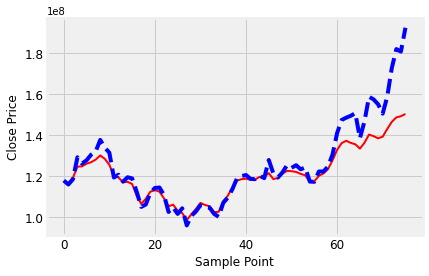

In [123]:
plotpredY = np.concatenate((inv_ypred, inv_yhat), axis=0)
plotactY =  np.concatenate((predY, invY), axis=0)
plt.figure(2)
plt.xlabel('Sample Point',fontsize=12)
plt.ylabel('Close',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(inv_yhat,'r-',label='Predicted',linewidth=2)
plt.plot(invY,'b--',label='Actual')
plt.style.use('fivethirtyeight')

# Tesla LSTM Model

In [124]:
# fix random seed for reproducibility
np.random.seed(67)
# load the dataset

tsla_df = tsla_csv[['Open','High','Low','Close', 'Adj Close', 'Volume']]
dataset = tsla_df.values

In [125]:
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 2
n_features = 6
n_obs = look_back*(n_features-1)+(n_features-1)
reframed = series_to_supervised(dataset, look_back, 1)
values = reframed.values

In [126]:
# split into train and test sets
train_size = int(len(values) * 0.70)
test_size = len(values) - train_size

train, test = values[0:train_size,:], values[train_size:len(values),:]

In [127]:
# reshape into X=t and Y=t+1

trainX, trainY = train[:, :n_obs], train[:, 4]
testX, testY = test[:, :n_obs], test[:, 4]

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back+1, n_features-1))
testX = np.reshape(testX, (testX.shape[0], look_back+1, n_features-1))

In [128]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(8, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
11/11 - 3s - loss: 0.0556
Epoch 2/200
11/11 - 0s - loss: 0.0422
Epoch 3/200
11/11 - 0s - loss: 0.0320
Epoch 4/200
11/11 - 0s - loss: 0.0236
Epoch 5/200
11/11 - 0s - loss: 0.0172
Epoch 6/200
11/11 - 0s - loss: 0.0118
Epoch 7/200
11/11 - 0s - loss: 0.0094
Epoch 8/200
11/11 - 0s - loss: 0.0081
Epoch 9/200
11/11 - 0s - loss: 0.0075
Epoch 10/200
11/11 - 0s - loss: 0.0069
Epoch 11/200
11/11 - 0s - loss: 0.0063
Epoch 12/200
11/11 - 0s - loss: 0.0056
Epoch 13/200
11/11 - 0s - loss: 0.0049
Epoch 14/200
11/11 - 0s - loss: 0.0043
Epoch 15/200
11/11 - 0s - loss: 0.0036
Epoch 16/200
11/11 - 0s - loss: 0.0030
Epoch 17/200
11/11 - 0s - loss: 0.0024
Epoch 18/200
11/11 - 0s - loss: 0.0019
Epoch 19/200
11/11 - 0s - loss: 0.0015
Epoch 20/200
11/11 - 0s - loss: 0.0011
Epoch 21/200
11/11 - 0s - loss: 9.0152e-04
Epoch 22/200
11/11 - 0s - loss: 7.2759e-04
Epoch 23/200
11/11 - 0s - loss: 6.1735e-04
Epoch 24/200
11/11 - 0s - loss: 5.5065e-04
Epoch 25/200
11/11 - 0s - loss: 5.1464e-04
Epoch 26/200
1

Epoch 192/200
11/11 - 0s - loss: 1.8319e-04
Epoch 193/200
11/11 - 0s - loss: 1.8636e-04
Epoch 194/200
11/11 - 0s - loss: 1.9379e-04
Epoch 195/200
11/11 - 0s - loss: 1.8319e-04
Epoch 196/200
11/11 - 0s - loss: 1.7540e-04
Epoch 197/200
11/11 - 0s - loss: 1.7825e-04
Epoch 198/200
11/11 - 0s - loss: 1.7496e-04
Epoch 199/200
11/11 - 0s - loss: 1.7642e-04
Epoch 200/200
11/11 - 0s - loss: 1.7342e-04


In [129]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [130]:
# invert predictions
trainX = trainX.reshape((trainX.shape[0], n_obs))

n_f = n_features - 1
# invert scaling for forecast
inv_ypred = np.concatenate((trainX[:,-n_f:],trainPredict), axis=1)

inv_ypred = scaler.inverse_transform(inv_ypred)
inv_ypred = inv_ypred[:,n_f]

In [131]:
# invert scaling for actual
trainY = trainY.reshape((len(trainY), 1))
predY = np.concatenate((trainX[:,-n_f:],trainY), axis=1)
predY = scaler.inverse_transform(predY)
predY = predY[:,n_f]

In [132]:
# make a prediction

testX = testX.reshape((testX.shape[0], n_obs))

In [133]:
# invert scaling for forecast
inv_yhat = np.concatenate((testX[:,-n_f:],testPredict), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,n_f]

In [134]:
# invert scaling for actual
testY = testY.reshape((len(testY), 1))
invY = np.concatenate((testX[:,-n_f:],testY), axis=1)
invY = scaler.inverse_transform(invY)
invY = invY[:,n_f]

In [135]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(invY, inv_yhat))
print('Test RMSE: %.8f' % rmse)

Test RMSE: 25121006.75966758


In [136]:
inv_ypred = inv_ypred.reshape((len(inv_ypred), 1))
predY = predY.reshape((len(predY), 1))
inv_yhat = inv_yhat.reshape((len(inv_yhat), 1))
invY = invY.reshape((len(invY), 1))
plotpredY = np.concatenate((inv_ypred, predY), axis=1)
plotactY = np.concatenate((inv_yhat, invY), axis=1)

In [137]:
trainPredictPlot = np.empty([len(dataset[:,0]),2])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(plotpredY)+look_back, :] = plotpredY

In [138]:
testPredictPlot = np.empty([len(dataset[:,0]),2])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(plotpredY)+look_back-1:len(dataset)-1, :] = plotactY


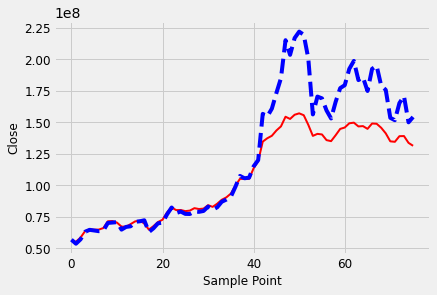

In [140]:
plotpredY = np.concatenate((inv_ypred, inv_yhat), axis=0)
plotactY =  np.concatenate((predY, invY), axis=0)
plt.figure(2)
plt.xlabel('Sample Point',fontsize=12)
plt.ylabel('Close',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(inv_yhat,'r-',label='Predicted',linewidth=2)
plt.plot(invY,'b--',label='Actual')
plt.style.use('fivethirtyeight')